In [22]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Part A. Binary Logistic Regression from Scratch

Reading, preprocessing and cleaning data

In [6]:
heart_disease = fetch_ucirepo(id = 45)
X = heart_disease.data.features # features
Y = heart_disease.data.targets # heart disease diagnosis
Y['num'] = (Y['num'] != 0)*1

C:\Users\aula02\AppData\Local\Temp\ipykernel_22896\2008545978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['num'] = (Y['num'] != 0)*1


In [7]:
display(X.head(5))
display(X.info())
display(X.describe())
display(heart_disease.variables)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [8]:
X_cat = X[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']]
X_num = X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']]

Encode categorical features

In [9]:
enc = OneHotEncoder(drop='first', sparse_output=False)

In [10]:
X_enc = enc.fit_transform(X_cat)
column_names = enc.get_feature_names_out(X_cat.columns)
X_enc = pd.DataFrame(X_enc, columns=column_names, index=X_cat.index)

Standardize numeric features

In [11]:
for cat in X_num.columns:
    X_num[cat] = (X_num[cat] - min(X_num[cat])) / (max(X_num[cat]) - min(X_num[cat]))

C:\Users\aula02\AppData\Local\Temp\ipykernel_22896\141412892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num[cat] = (X_num[cat] - min(X_num[cat])) / (max(X_num[cat]) - min(X_num[cat]))
C:\Users\aula02\AppData\Local\Temp\ipykernel_22896\141412892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num[cat] = (X_num[cat] - min(X_num[cat])) / (max(X_num[cat]) - min(X_num[cat]))
C:\Users\aula02\AppData\Local\Temp\ipykernel_22896\141412892.py:2: SettingWithCopyWarning: 
A value is trying to be set on

In [12]:
X_final = pd.concat([X_cat, X_num], axis=1)

The missings are so few that can be just deleted

In [13]:
pd.concat([X_final, Y], axis=1)

,sex,cp,fbs,restecg,exang,slope,thal,age,trestbps,chol,thalach,oldpeak,ca,num
0,1,1,1,2,0,3,6.0,0.708333,0.481132,0.244292,0.603053,0.370968,0.000000,0
1,1,4,0,2,1,2,3.0,0.791667,0.622642,0.365297,0.282443,0.241935,1.000000,1
2,1,4,0,2,1,2,7.0,0.791667,0.245283,0.235160,0.442748,0.419355,0.666667,1
3,1,3,0,0,0,3,3.0,0.166667,0.339623,0.283105,0.885496,0.564516,0.000000,0
4,0,2,0,2,0,1,3.0,0.250000,0.339623,0.178082,0.770992,0.225806,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,0,0,0,2,7.0,0.333333,0.150943,0.315068,0.465649,0.193548,0.000000,1
299,1,4,1,0,0,2,7.0,0.812500,0.471698,0.152968,0.534351,0.548387,0.666667,1
300,1,4,0,0,1,2,7.0,0.583333,0.339623,0.011416,0.335878,0.193548,0.333333,1
301,0,2,0,2,0,2,3.0,0.583333,0.339623,0.251142,0.786260,0.000000,0.333333,1


In [14]:
df = pd.concat([X_final, Y], axis=1)
df = df.dropna()

In [15]:
X_final = df[[c for c in df.columns if c!= 'num']]
Y_final = df[['num']]

Creating the optimization algorithm

In [16]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def f(X,theta):
    f = sigmoid(X.dot(theta))
    return f

def log_likelihood(X,Y,theta):
    return (Y*np.log(f(X,theta) + 1e-6 ) + (1-Y)*np.log(1-f(X,theta) + 1e-6)).mean()

def loglik_gradient(theta, X, Y):
    return X.T @ (f(X, theta)-Y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_final.to_numpy(), Y_final['num'], test_size=0.3, random_state=42)

In [50]:
threshold = 1e-5
step_size = 8e-5

theta, theta_prev = np.zeros((13,)) , np.ones((13,))
opt_pts = [theta]
opt_grads = []
iter = 0

max_iter = 200000

I0 = []
LL0 = []

while np.linalg.norm(theta - theta_prev) > threshold:
    LL = log_likelihood(X_train, y_train, theta)
    if iter % 500 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, LL))
    theta_prev = theta
    gradient = loglik_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    I0.append(iter)
    LL0.append(LL)
    iter += 1
    if iter == max_iter:
        print('Max iter reached')
        break

print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(X_train, y_train, theta)))

Iteration 0. Log-likelihood: -0.693145
Iteration 500. Log-likelihood: -0.573220
Iteration 1000. Log-likelihood: -0.525589
Iteration 1500. Log-likelihood: -0.496130
Iteration 2000. Log-likelihood: -0.476284
Iteration 2500. Log-likelihood: -0.462071
Iteration 3000. Log-likelihood: -0.451426
Iteration 3500. Log-likelihood: -0.443180
Iteration 4000. Log-likelihood: -0.436624
Iteration 4500. Log-likelihood: -0.431302
Iteration 5000. Log-likelihood: -0.426906
Iteration 5500. Log-likelihood: -0.423221
Iteration 6000. Log-likelihood: -0.420092
Iteration 6500. Log-likelihood: -0.417406
Iteration 7000. Log-likelihood: -0.415076
Iteration 7500. Log-likelihood: -0.413037
Iteration 8000. Log-likelihood: -0.411237
Iteration 8500. Log-likelihood: -0.409637
Iteration 9000. Log-likelihood: -0.408203
Iteration 9500. Log-likelihood: -0.406912
Iteration 10000. Log-likelihood: -0.405741
Iteration 10500. Log-likelihood: -0.404673
Iteration 11000. Log-likelihood: -0.403696
Iteration 11500. Log-likelihood: -0

In [51]:
y_test_prob = f(X_test, theta)
y_test_pred = (y_test_prob >= 0.5) * 1

In [52]:
threshold = 1e-5
step_size = 1e-1

theta, theta_prev = np.zeros((13,)) , np.ones((13,))
opt_pts = [theta]
opt_grads = []
iter = 0

max_iter = 200000

I1 = []
LL1 = []

while np.linalg.norm(theta - theta_prev) > threshold:
    LL = log_likelihood(X_train, y_train, theta)
    if iter % 500 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, LL))
    theta_prev = theta
    gradient = loglik_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    I1.append(iter)
    LL1.append(LL)
    iter += 1
    if iter == max_iter:
        print('Max iter reached')
        break

print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(X_train, y_train, theta)))

Iteration 0. Log-likelihood: -0.693145
Iteration 500. Log-likelihood: -3.419950
Iteration 1000. Log-likelihood: -3.405547
Iteration 1500. Log-likelihood: -3.281141
Iteration 2000. Log-likelihood: -3.128759
Iteration 2500. Log-likelihood: -4.374408
Iteration 3000. Log-likelihood: -2.475506
Iteration 3500. Log-likelihood: -2.408927
Iteration 4000. Log-likelihood: -3.075695
Iteration 4500. Log-likelihood: -3.207031
Iteration 5000. Log-likelihood: -2.996476
Iteration 5500. Log-likelihood: -2.473645
Iteration 6000. Log-likelihood: -4.079409
Iteration 6500. Log-likelihood: -4.109003
Iteration 7000. Log-likelihood: -3.052283
Iteration 7500. Log-likelihood: -4.395483
Iteration 8000. Log-likelihood: -2.481999
Iteration 8500. Log-likelihood: -4.528039
Iteration 9000. Log-likelihood: -3.704090
Iteration 9500. Log-likelihood: -2.987980
Iteration 10000. Log-likelihood: -3.018626
Iteration 10500. Log-likelihood: -2.451787
Iteration 11000. Log-likelihood: -2.506720
Iteration 11500. Log-likelihood: -2

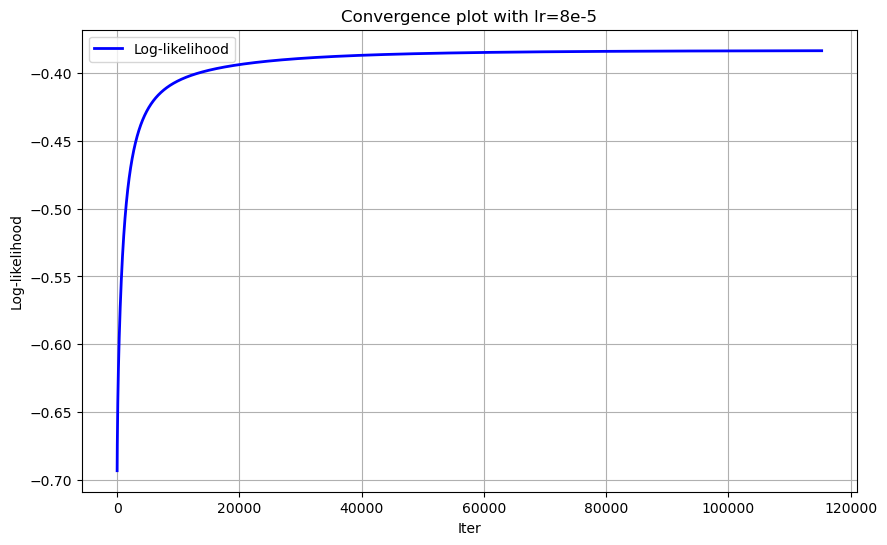

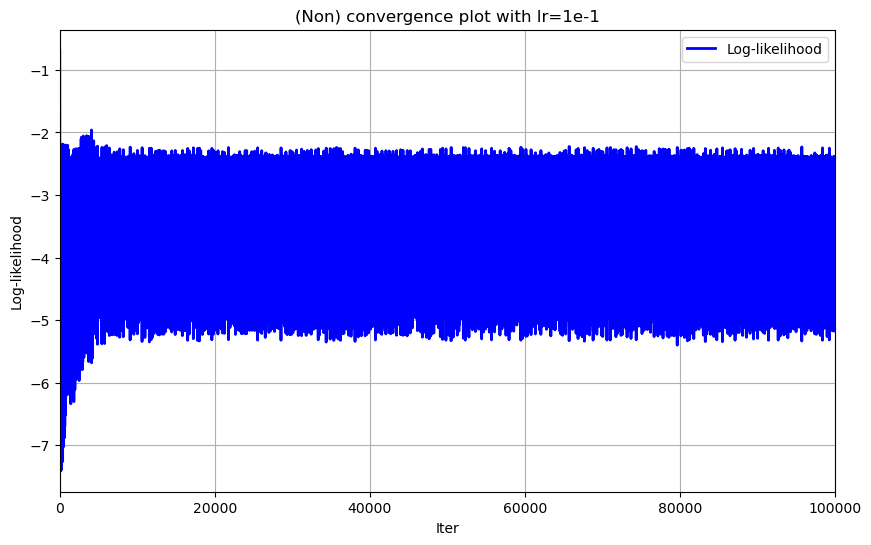

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(I0, LL0, label='Log-likelihood', color='blue', linewidth=2)
plt.title('Convergence plot with lr=8e-5')
plt.xlabel('Iter')
plt.ylabel('Log-likelihood')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(I1, LL1, label='Log-likelihood', color='blue', linewidth=2)
plt.title('(Non) convergence plot with lr=1e-1')
plt.xlabel('Iter')
plt.ylabel('Log-likelihood')
plt.xlim(0, 100000)
plt.legend()
plt.grid(True)
plt.show()

In [58]:
lr = LogisticRegression(fit_intercept=True, random_state=1234)
lr.fit(X_train, y_train)
y_test_pred_sk = lr.predict(X_test)

Evaluation metrics

In [55]:
def find_conf_matrix_values(y_true,y_pred):
  TP = sum((y_true == 1) & (y_pred == 1))
  FN = sum((y_true == 0) & (y_pred == 1))
  FP = sum((y_true == 1) & (y_pred == 0))
  TN = sum((y_true == 0) & (y_pred == 0))
  return TP,FN,FP,TN

def my_accuracy_score(y_true, y_pred):
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return (TP + TN)/(TP + FN + FP + TN)

def my_precision_score(y_true, y_pred):
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return TP / (TP + FP)

def my_recall_score(y_true, y_pred):
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return TP / (TP + FN)

def my_f1_score(y_true, y_pred):
  recall = my_recall_score(y_true,y_pred)
  precision = my_precision_score(y_true,y_pred)
  return 2 * (precision * recall) / (precision + recall)

In [56]:
print('Results with Gradient Descent:\n')
print('Accuracy: %.6f' % (my_accuracy_score(y_test,y_test_pred)))
print('Precision: %.6f' % (my_precision_score(y_test,y_test_pred)))
print('Recall: %.6f' % my_recall_score(y_test,y_test_pred))
print('F1-Score: %.6f' % my_f1_score(y_test,y_test_pred))

Results with Gradient Descent:

Accuracy: 0.877778
Precision: 0.853659
Recall: 0.875000
F1-Score: 0.864198


In [59]:
print('Results with Sk-Learn:\n')
print('Accuracy: %.6f' % (my_accuracy_score(y_test,y_test_pred_sk)))
print('Precision: %.6f' % (my_precision_score(y_test,y_test_pred_sk)))
print('Recall: %.6f' % my_recall_score(y_test,y_test_pred_sk))
print('F1-Score: %.6f' % my_f1_score(y_test,y_test_pred_sk))

Results with Sk-Learn:

Accuracy: 0.888889
Precision: 0.853659
Recall: 0.897436
F1-Score: 0.875000


Despite the more time of computing, the results are better with sk-learn algorithm. This difference probably is result of the use of a better optimization strategy.